



# Assignment #2 - Classification

<font color="red"> <b> Due: Oct 23 (Friday) 11:00 pm </b> </font>

<font color="blue"> Ashesh Shahi </font>


# I. Introduction/Overview

In this assignment, the goal is to implement four algorithms namely Pocket, QDA, LDA and Logistic Regression. Firstly, I imported the libraries that are required then described about dataset which is used in this assignment. After that I loaded the data and played with it using shape, info,describe and corr method. After that I performed the Visualization of target feature and other features using "Matplotlib" and "Seaborn".I also showed the correlation between different features by using  heatmap.Moving forward I performed the preprocessing on data by first dropped few columns which are not important,filled the missing values and then splitted the data into train and test data. I have also written few helping functions like confusion matrix, estimation matrix and split.Then for implementation of four algorithms, one super class is defined which is inherited by all the four classes defined for each algorithm respectively. Finally, I trained the models and test it on the dataset. I showed the performance of models using accuracy_score and confusion matrix and then I compared the models like which algorithms performs better.


# II. Data

Introduce your data and visualize them. Describe your observations about the data.
You can reuse the data that you examined in Assignment #0 (of course for classification). 

#### Description of Data

The data set which I am going to use for classification is also picked from Kaggle, description of the dataset is listed below:<br>
Name of the dataset is "Rain in Australia"<br>
We can download the dataset from the link provided : https://www.kaggle.com/jsphyg/weather-dataset-rattle-package<br>
Related Aricles - This dataset is used in total one hundred seventy projects. Names of few projects are listed following:<br>
         1. Will it rain tomorrow?
         2. Rainfall Prediction using 7 popular models.
         3. Predicting the amount of rainfall in Sydney
         4. Rain Tomorrow in AUS by XGBoostClassifier

The weather dataset contains ten years data of daily weather observations from various Australian weather stations.The purpose is to predict whether it will rain tomorrow or not?. It has 24 features including the target feature. The description of columns are listed as below:-<br>
1: Date - Shows the observation's date<br>
2: Location - Location's common name for weather station<br>
3: MinTemp - Minimum temperature in degree celsius<br>
4: MaxTemp - Maximum temperature in degree celsius<br>
5: Rainfall - Amount of rainfall recorded for the day in millimeters(mm)<br>
6: Evaporation - Class A pan evaporation (mm) in the 24 hours to 9am<br>
7: Sunshine - Number of hours bright sunshine in the day<br>
8: WindGustDir - Direction of the strongest wind gust in the 24 hours to midnight<br>
9: WindGustSpeed - The speed(Km/Hr) of the strongest wind gust in the 24 hours to midnightbr>
10: WindDir9am - Direction of wind at 9AM<br>
11: WindDir3pm - Direction of wind at 3PM<br>
12: WindSpeed9am - Wind speed(Km/hr) averaged over 10 minutes prior to 9AM<br>
13: WindSpeed3pm - Wind speed(Km/hr) averaged over 10 minutes prior to 3PM<br>
14: Humidity9am - Humidity(in percent) at 9AM<br>
15: Humidity3pm - Humidity(in percent) at 3PM<br>
16: Pressure9am - Atmospheric pressure (hpa) reduced to mean sea level at 9am<br>
17: Pressure3pm - Atmospheric pressure (hpa) reduced to mean sea level at 3pm<br>
18: Cloud9am - Fraction of sky obscured by cloud at 9AM.Measured in "oktas",unit of eigths. It records how many eigths of <br>                sky are obscured by cloud.0 measure indicates completely clear sky whereas 8 indicates completely overcast.<br>
19: Cloud3pm - Fraction of sky obscured by cloud at 3PM<br>
20: Temp9am - Temperature(in degrees celsius) at 9AM<br>
21: Temp3pm- Temperature (in degrees celsius) at 3PM<br>
22: RainToday - If precipitation(mm) in the 24 hours to 9AM exceeds 1mm then Yes, No otherwise<br>
23: RISK_MM - The amount of next day rain in mm. Used to create target feture RainTomorrow. A kind of measure of the "risk"<br>
24: RainTomorrow: Shows will it rain tomorrow This is out target feature

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
weather1 = pd.read_csv("./archive/weatherAUS.csv")
weather1

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No


In [3]:
weather1.shape

(142193, 24)

In [4]:
weather1.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [5]:
weather1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
Date             142193 non-null object
Location         142193 non-null object
MinTemp          141556 non-null float64
MaxTemp          141871 non-null float64
Rainfall         140787 non-null float64
Evaporation      81350 non-null float64
Sunshine         74377 non-null float64
WindGustDir      132863 non-null object
WindGustSpeed    132923 non-null float64
WindDir9am       132180 non-null object
WindDir3pm       138415 non-null object
WindSpeed9am     140845 non-null float64
WindSpeed3pm     139563 non-null float64
Humidity9am      140419 non-null float64
Humidity3pm      138583 non-null float64
Pressure9am      128179 non-null float64
Pressure3pm      128212 non-null float64
Cloud9am         88536 non-null float64
Cloud3pm         85099 non-null float64
Temp9am          141289 non-null float64
Temp3pm          139467 non-null float64
RainToday        140787 non-null obje

As we can see here that the most features, data type is float. Few of them have object as well.It also shows the number of entries for each features. We can see that there are features which have less entries than the rest of the features.for eg: Sunshine has the least amount of entries.It also shows that no features are null which means every feature have some entries.

In [6]:
weather1.loc[:,'RainTodayT'] = weather1['RainToday'].replace({'No': -1, 'Yes': 1})

In [7]:
weather_num=weather1[["MinTemp","MaxTemp","Rainfall","Evaporation","Sunshine","WindGustSpeed","WindSpeed9am","WindSpeed3pm","Humidity9am","Humidity3pm","Pressure9am","Pressure3pm","Cloud9am","Cloud3pm","Temp9am","Temp3pm","RISK_MM"]]
weather_num.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


I extracted all the numerical variables first, althogh it is not required for the "describe". But I did it because, I might need it further.As, we know describe function shows the mean,maximum,minimum values of numerical features or columns.It also shows the "standard deviation" which shows how data are dispersed from the mean. Describe function also shows quartiles like 25%,50% and 75% respectively. For eg- 25% values of MinTemp is lower than 7.60 degree C. Similarly 50% values of MinTemp is lower than 12.00 degree C and 75% values of MinTemp is less than 16.8 degree C. Similarly we can look for other features. We can also see how the features are scaled i.e. how values of different features varies.

In [9]:
cor_matrix = weather1.corr()
cor_matrix['RainTodayT'].sort_values(ascending=False)

RainTodayT       1.000000
Rainfall         0.500997
Humidity3pm      0.378766
Humidity9am      0.353358
Cloud9am         0.305950
Cloud3pm         0.272149
RISK_MM          0.223120
WindGustSpeed    0.155490
WindSpeed9am     0.102267
WindSpeed3pm     0.080074
MinTemp          0.056185
Temp9am         -0.096593
Pressure3pm     -0.106298
Evaporation     -0.187975
Pressure9am     -0.189804
MaxTemp         -0.228884
Temp3pm         -0.234925
Sunshine        -0.330635
Name: RainTodayT, dtype: float64

This shows the correlation of target feature with other numerical features. Rainfall is highly correlated with the target feature. Conversely "Sunshine" is least correlated with it.

### Visualizations and Premilinary Observations

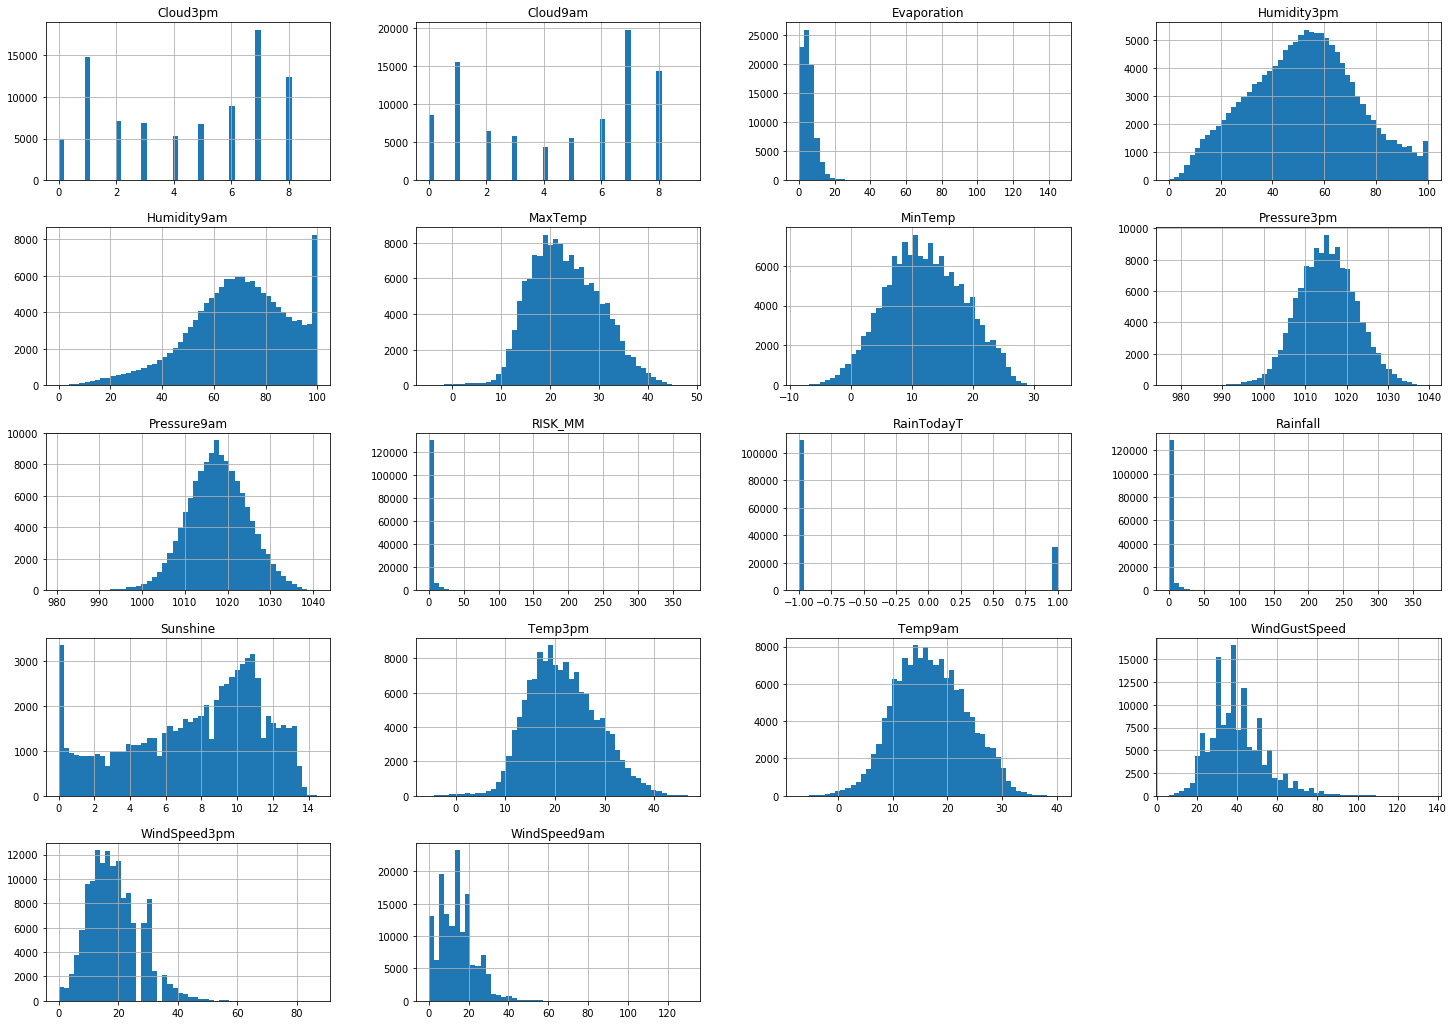

In [10]:
weather1.hist(bins=50, figsize=(25,18))
plt.show()

We can see the similar things from the plots as we see using describe function.This plot shows the graphical representation of ecah numerical feature. For eg- If we see the Temp9am feature's data is mostly in between 10 to 20. we can verify it from describe function as well, as it also tells that mean value is around 17.In the plot above X axis shows the features values and Y axis shows the count per value.

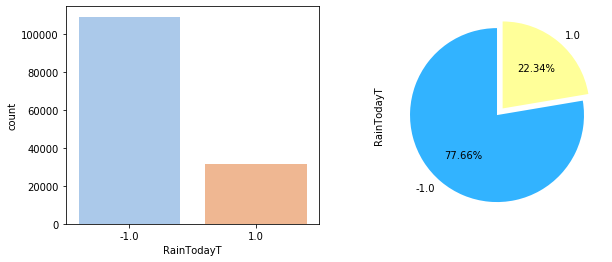

In [11]:
fig, ax =plt.subplots(nrows=1,ncols=2, figsize=(10,4))

sns.countplot(weather1['RainTodayT'], palette="pastel", ax=ax[0])
weather1['RainTodayT'].value_counts().plot.pie(autopct="%1.2f%%", ax=ax[1], colors=['#32b3ff','#ffff99'], explode = (0, 0.1), startangle=90)
plt.show()

This Counplot and pie chart of target feature "RainTodayT" shows that there is more chance of no rain today. As we can see that there will be no chance of rain today.

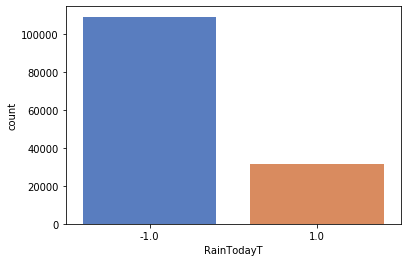

In [12]:
sns.countplot(weather1['RainTodayT'], palette="muted")

This Counplot of feature "RainTodayT" shows that there is no rain today for almost most instance of data. Only around 35k data instances shows the value "Yes" for RainTodayT.

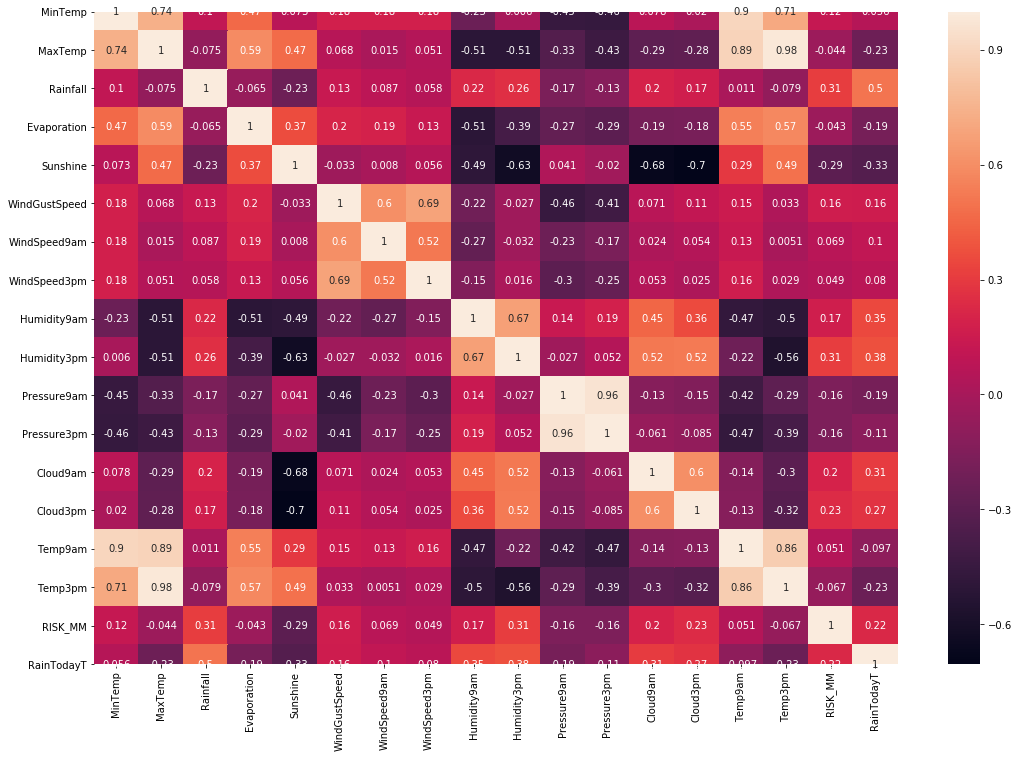

In [13]:
plt.figure(figsize=(18, 12))
corr = sns.heatmap(weather1.corr(), annot=True)

We can see here the correlation amongst all the numerical features with each other though heatmap.Each feature shows corrleation 1 with itself which is true. As we see that MinTemp and MaxTemp are positively correlated.Similarly, Maxtemp and both humidity features are inversely correlated.

In [14]:
# Function for Splitting the data

def split(X, T, ratio=[0.75, 0.25]): 
    
    assert(np.sum(ratio) == 1)
    
    # shuffle the data indices 
    idxs = np.random.permutation(X.index)
    
    # the number of samples 
    N = X.shape[0]
    
    Xs = []
    Ts = []
    i = 0  # first index to zero
    for k, r in enumerate(ratio):
        nrows = int(round(N * r))  # number of rows
        
        if k == len(ratio) -1:
            Xs.append(X.iloc[i:, :])
            Ts.append(T.iloc[i:, :])
        else:
            Xs.append(X.iloc[i:i+nrows, :])
            Ts.append(T.iloc[i:i+nrows, :])
        
        i += nrows
    
    return Xs, Ts

### Preprocessing

Now, I will perform preprocessing step on weather1 data.I know it is not required for the assignment. But there are missing values for most of the features. So, I will fill those missing values.

In [15]:
weather1 = weather1.drop(["Date","Location","Sunshine","Evaporation","Temp9am","Temp3pm","MaxTemp","Pressure9am","Pressure3pm","RISK_MM"], axis=1)

In [16]:
weather1.isnull().sum()

MinTemp            637
Rainfall          1406
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Cloud9am         53657
Cloud3pm         57094
RainToday         1406
RainTomorrow         0
RainTodayT        1406
dtype: int64

Now, we can see here that, there are only one column which do not have any missing values which is also our target feature. So, we have to handle with the missing values. We can handle it by either dropping the whole column, or droping the subset where there are missing values, or we can fill the value with mean, median etc, or either fill with NaN or zero. But before doing that let's split the data set into train and test set using train_test_split.

In [17]:
weather1 = weather1[pd.notnull(weather1['RainToday'])]

In [18]:
weather1.loc[:,'RainToday1'] = weather1['RainTodayT'].apply(lambda x: 1 if x ==-1 else 0)
weather1.loc[:,'RainToday2'] = weather1['RainTodayT'].apply(lambda x: 1 if x ==1 else 0)

In [19]:
weather_new = weather1[["Humidity3pm","Rainfall"]]

In [20]:
y = weather1[["RainTodayT"]]
y

,RainTodayT
0,-1.0
1,-1.0
2,-1.0
3,-1.0
4,-1.0
...,...
142188,-1.0
142189,-1.0
142190,-1.0
142191,-1.0


In [21]:
y_lr = weather1[["RainToday1", "RainToday2"]]

In [22]:
mean = weather_new.mean(axis=0)

In [23]:
weather_new.fillna(mean, inplace=True)

C:\Users\ashes\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [24]:
weather_new.isnull().sum()


Humidity3pm    0
Rainfall       0
dtype: int64

In [25]:
X_raw,T_raw = split(weather_new,y)

In [26]:
Xlr,Tlr = split(weather_new,y_lr)

In [27]:
Xtrain, Xtest = [x.values for x in X_raw]
Ttrain, Ttest = [t.values for t in T_raw]

In [28]:
Xtrain_lr, Xtest_lr = [x.values for x in Xlr]
Ttrain_lr, Ttest_lr = [t.values for t in Tlr]

In [29]:
Xtrain.shape, Xtest.shape,Ttest.shape

((105590, 2), (35197, 2), (35197, 1))

# III. Method

Summarize the pocket algorithm, discriminant analysis, and logistic regression.
The superclass *Classifier* defines common utility methods. 
Finish the normalize function for you. 
Do not forget explain your implementation. 

The explanation of your codes should not be the comments in a code cell. 
This section should include
 - review of the 4 classification models 
 - your implementation and description


#### Summary and Description of all models

#### SDA and LDA

Since, LDA and QDA are related to each other. I'll summarize them together.LDA stands for "Linear Discriminant Analysis" where as QDA stands for  "Quadratic Discriminant Analysis".

The underlying assumption for both LDA and QDA is that each class comes from normal distribution. LDA uses a linear combination of predictor variables X, Whereas QDA models and classifies the categorical response Y with a non-linear combination of predictor variables X.Both,these classifiers are attractive because they have closed-form solutions that can be easily computed

LDA- LDA assumes that the observations are derived from a multivariate Gaussian distribution for each class and that the covariance of the predictor variables is common throughout the response variable Y ,across all k levels.

QDA -QDA is closely related to linear discriminant analysis (LDA),where it is assumed that the measurements are normally distributed. The decision boundary of QDA is quadratic which can be used to solve wider range of problems.Since the number of QDA parameters is quadratic, QDA should be used with care when the feature space is large.

As stated above that both QDA and LDA assumes that the observations from each class of Y are drawn from a Gaussian distribution, they are similar in this manner. Unlike LDA however, in QDA there is no assumption that the covariance of each of the classes is identical, i.e. the predictor variables are not assumed to have common variance across each of the k levels in Y.Also, to estimate the parameters required in quadratic discrimination more computation and data is required than in the case of linear discrimination.

#### Pocket Algorithm
Pocket Algorithm is an algorithm developed to overcome the unstability of perceptron algorithm. A single perceptron is a linear model that applies a step function on the linear output.For classification, it iterates over the training examples, and update the weights in a way that would result in correct classification.However, there is no gurantee of convergence, if the data is not linearly separable.Pocket algorithm overcome the unstability of the perceptron algorithm by simply keeping or remembering the best solution so far in its pocket.The best result means the number of misclassification is minimum. If the new weights produce a smaller number of misclassification than the weights in the pocket, then replace the weights in the pocket to the new weights; if the new weights are not better than the one in the pocket, keep the one in the pocket and discard the new weights. At the end of the training iteration, the algorithm returns the solution in the pocket, rather than the last solution.

#### Logistic Regression
Logistic Regression is another classification model. It is a binary classifier which is used to predict the probability of an instace belonging to a particular class. By default, if the probability is greater than 0.5, then the classifier predicts that the instance belong to class labelled 1(mostly used as positive class), otherwise instance belongs to class labelled 0(mostly used as negative class). The hypothesis of logistic regression tends it to limit the cost function between 0 and 1.

#### Implementation and Explanation of codes

### A. Super Classs Definition

We first define the super class for classification algorithms. You only need to complete the normalize() method. You don't need to modify anything else. 

In [30]:
import numpy as np
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    

class Classifier(BaseModel):
    """
        Abstract class for classification 
        
        Attributes
        ==========
        meanX       ndarray
                    mean of inputs (from standardization)
        stdX        ndarray
                    standard deviation of inputs (standardization)
    """

    def __init__(self, ):
        self.meanX = None
        self.stdX = None

    def normalize(self, X):
        """ standardize the input X """
        
        if not isinstance(X, np.ndarray):
            X = np.asanyarray(X)

        self.meanX = np.mean(X, 0)
        self.stdX = np.std(X, 0)

        
        Xs = (X - self.meanX)/self.stdX
        return Xs

    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        pass
    
    @abstractmethod
    def use(self, X):
        pass 

For the rest of implementation, inherit the class and make your own Pocket, QDA, LDA, and LogisticRegress classes. Each following subsection will have toy tests as we did in the note before applying to your data.

### B. Pocket Algorithm


In [31]:
class Pocket(Classifier):
    
    def __init__(self,alpha,maxiter):
        Classifier.__init__(self)
        self.w = None
        
        
    def compare(self, X, T, w):
        y = np.sign(X @ w)
        yp = np.sign(X @ self.w)
        return np.sum(y) >= np.sum(yp)
    
    def train(self, X,T):
        X1 = self.add_ones(X)
        self.w = w = np.zeros(X1.shape[1])
        for i in range(maxiter):
            print('Iteration number ....',i)
            converged = True
            for k in range(N):
                y = w @ X1[k]
                if np.sign(y) != np.sign(T[k]):
                    w += alpha * T[k] * X1[k]
                    converged = False
                    if self.compare(X1,T,w):
                        self.w = w
            if converged:
                print("converged at ", i)
                break
        self.w = w
        return w
    
    def use(self, X):
        X1 = self.add_ones(X)
        res = X1 @ self.w
        return [1 if x > 0 else -1 for x in res]


I made a class named Pocket inside which several functions are defined. First function is __init__ which is also main function.Here I assigned self.w to None initially. Second function wpocket is used to find the pocket weight by updating the weight if the current weight predicts more labels than the previous weight. After that train function is defined inside which firsly, I am adding the ones to input feature then asssigning zero weights initially.Next, it is iterating till the number of iteration provided and converged is assigned to True. After that it is iterating on all samples and calculating the output.Then I am checking if the target and predicted didn't match then updating the weight vector using the equation provided below. Finally I am checking wpocket and if the update is true. Then checking if the weight is converged then return the weight vector. Finally, I defined use function inside which first I am adding the ones to input feature. Then calculating the res and finally returning 1 if res > 0 and return -1 if < 0.

**Formula for weight update**
 $$
w^{(k+1)} = w^{(k)} + \alpha t_i x_i
$$



### C. QDA

In [32]:
class Qda(Classifier):
    
    def __init__(self,N):
        Classifier.__init__(self)
        self.N = N
        self.prior = None
        self.mu = None
        self.sigma = None
    
    def train(self, X,T):
        self.mu = np.mean(X,0)
        self.sigma = np.cov(X.T)
        self.prior = len(T)/self.N
    
    def use(self, X):
        diffv = np.array(X - self.mu)
        sigma_inv = np.linalg.inv(self.sigma)
        return -0.5  * np.log(np.linalg.det(self.sigma)) \
            - 0.5 * np.sum(diffv @ sigma_inv * diffv, axis=1) \
            + np.log(self.prior)

I made a class name QDA which inherits the properties of class name Classifier. Inside it few functions are defined, first function is __init__ which is also main function. I have assigned self.prior, self.mu and self.sigma value to None initially. After that I defined train function inside which first I am finding the mean of the input feature vector. Secondly,finding the co-variance of the input feature vector. Lastly,finding the prior Probabilty for the give class. In use function, I am implementing the function listed below.Firstly it checks that the train is called and we have initialized the mean,co-variance and sigma and converting the difference between each instance and the mean value to array. Then finding the inverse of covariance matrix sigma. Finally, I am returning the formula of QDA function as listed below

**QDA Formula**
$$
\delta_k(x) = -\frac{1}{2} \ln \vert \boldsymbol\Sigma_k \vert - \frac{1}{2} (x - \boldsymbol\mu_k)^\top \boldsymbol\Sigma_k^{-1} (x- \boldsymbol\mu_k) + \ln P(T = k). 
$$


### D. LDA

In [33]:
class Lda(Classifier):
    
    def __init__(self, N):
        Classifier.__init__(self)
        self.N = N
        self.prior = None
        self.mu = None
        self.sigma = None
    
    def cov(self,X):
        self.sigma = np.cov(X.T)
    
    def train(self, X,T):
        self.mu = np.mean(X,0)
        self.prior = len(T)/ N
        
    def use(self,X):
        sigma_iv = np.linalg.inv(self.sigma)
        return np.sum((X @ sigma_iv) * self.mu \
                - 0.5 * (self.mu @ sigma_iv) * self.mu, axis=1) \
                + np.log(self.prior)

I made a class name LDA to implement "Linear Discriminant Analysis" method. Inside this class few functions are defined.First function is init which is also main function. I have assigned self.prior, self.mu and self.sigma value to None initially.After that cov finction is defined to calcualte the co-variance for the enitre training sample space for all the classes.The function train is defined for finding the mean of the input feature vector and the prior Probabilty for the given class.Lastly,use function is defined which firstlychecks that the train is called and we have initialized the mean,co-variance and sigma.Secondly, finding the inverse of covariance matrix sigma. Finally it returns the formula of LDA mentioned below.

**LDA Formula**
$$
\delta_k(x) = x^\top \boldsymbol\Sigma^{-1} \boldsymbol\mu_k -\frac{1}{2} \boldsymbol\mu_k^\top \boldsymbol\Sigma^{-1}\boldsymbol\mu_k + \ln P(T = k).
$$

### E. Logistic Regression

In [34]:
class LogReg(Classifier):
    
    def __init__(self, alpha, maxiter):
        Classifier.__init__(self)
        self.alpha = alpha
        self.maxiter = maxiter
        self.w = None
        
    def softmax(self, X, w):
        z = X @ w
        if not isinstance(z, np.ndarray):
            z = np.asarray(z)
        f = np.exp(z)
        return f / (np.sum(f, axis=1, keepdims=True) if len(z.shape) == 2 else np.sum(f))
    
    def train(self,X,T):
        X1 = self.add_ones(X)
        self.w = np.zeros((X1.shape[1],Ttrain_lr.shape[1]))
        for i in range(self.maxiter):
            print('The current step iteration is ',i)
            ys = self.softmax(X1, self.w)
            self.w += self.alpha * X1.T @ (T - ys)
            #not added convergence yet
        return self.w
    
    def use(self,X):
        X1= self.add_ones(X)
        y1 = self.softmax(X1,self.w)
        return np.argmax(y1, 1)

I made a classname LogReg to implement Logistic regression algorithm. I defined few function inside this class like __init__,softmax, train, use. __init__ is the main function where I initiallize alpha,maxiter and, assign weight to None initially. After that I defined softmax function which is used to predict the probability of a label given the particular input feature vector. It uses the below equation, using exponents to make it easier to compute. Train function is iterating over the maxiter and updating the weight vector using equation mentioned below.Finally use function is to use softmax function and return the argmax of predicted output.

$$
P(T=k \mid x) = \frac{\kappa_k}{\sum_{c=1}^K \kappa_c}
$$


$$
w \leftarrow w + \alpha X^\top \Big(  T - g(X)\Big).
$$

# IV. Experiments

Apply the classfiers on the data and discuss the results.
Please describe your codes for experiments. You may have subsections of results and discussions here.
Here follows the list that you consider to include:
- the classification results
- plots of classification results 
- model comparision 
- choice of evaluation metrics
- **Must partition data into training and testing** - I have performed the partition of data in preprocessing section. Please have a look

#### Discussion about evalution matrix

I am going to use two evaluation matrix which are Accuracy score and Confustion matrix. Accuracy is the fraction of predictions our model got right. Formally, accuracy has the following definition: Accuracy = Number of correct predictions/ Total number of predictions<br>
A much better way to evaluate the performance of a classifier is to look at the confusion matrix. The general idea is to count the number of times instances of class A are classified as class B. 

In [35]:
# Confustion matrix 

def confusion_matrix(Y, T):
    """
        Y    ndarray
             predicted labels
        T    ndarray
             target labels
             
        @cfm DataFrame
             confusion matrix
    """
    
    if len(Y) != len(T):
        raise ValueError("Wrong prediction and target length!")
    
    classes = np.unique(T)
    n_classes = len(classes)
    
    cfm = pd.DataFrame(np.zeros((n_classes, n_classes)), index=classes, columns=classes, dtype=int)
    
    Tidx = [T == c for c in classes]
    for c in classes:
        pred_idx = Y == c
        cfm.loc[c, :] = [np.sum(np.logical_and(pred_idx, tidx)) for tidx in Tidx]
    
    return cfm

In [36]:
def estimation_matrix(CM):
    #precision
    precision = CM[1,1] / (CM[1,1] + CM[1,0])
    print('The precision of the model is ',precision)
    #recall
    recall = CM[1,1] / (CM[0,1] + CM[1,1])
    print('The recall of the model is ',recall)
    #specificity
    specificity = CM[0,0] / (CM[0,0] + CM[1,0])
    print('The specificity of the model is ',specificity)
    #f1-score
    f1_score = 2*((precision*recall)/(precision + recall))
    print('The f1 Score of the model is ',f1_score)


These functions Confusion Matrix and Estimation is created for the evaluation purposes.

#### Normalization of Data

In [37]:
clf = Classifier.__init__
Xs = Classifier.normalize(clf,Xtrain)
means, stds = clf.meanX, clf.stdX
X_tests = (Xtest - means) / stds

Xs_lr = Classifier.normalize(clf,Xtrain_lr)
means_lr, stds_lr = clf.meanX, clf.stdX
Xtests_lr = (Xtest_lr - means_lr) / stds_lr

In [38]:
Xs1 = np.hstack((Xs,Ttrain))
X_clf,T_clf = Xs[np.where(Xs1[:,-1] == -1)],Ttrain[np.where(Xs1[:,-1] == 1)]
X_clf1,T_clf1 = Xs[np.where(Xs1[:,-1] == 1)],Ttrain[np.where(Xs1[:,-1] == 1)]

#### Experiment with Pocket Algorithm

In [39]:
N = len(Xs)
alpha = 0.1
maxiter = 10 
pockt = Pocket(alpha,maxiter)
W = pockt.train(Xs,Ttrain)

y_pockt = pockt.use(X_tests)
y_poc = Ttest.flatten()

Iteration number .... 0
Iteration number .... 1
converged at  1


#### Discussion of train and test accuracies

In this section I will show the accuracy, precision,recall,specificity and f1 score of the Perceptron Model using accuracy, confusion matrix and estimation matrix.

In [110]:
print("The Accuracy of Pocket Algorithm is: ", 100 - np.mean(np.abs(y_poc - y_pockt)) * 100, "%")


The Accuracy of Pocket Algorithm is:  99.99431769753105 %


In [111]:
CM = confusion_matrix(y_pockt,y_poc)
CM = CM.values

In [42]:
estimation_matrix(CM)

The precision of the model is  1.0
The recall of the model is  0.9998677948175568
The specificity of the model is  1.0
The f1 Score of the model is  0.9999338930389371


#### Visualization for Pocket Algorithm

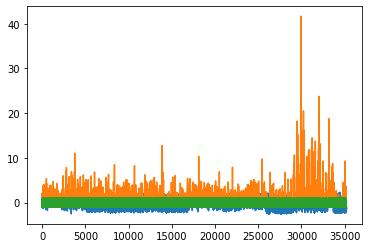

In [104]:
plt.plot(X_tests)
plt.plot(y_pockt)

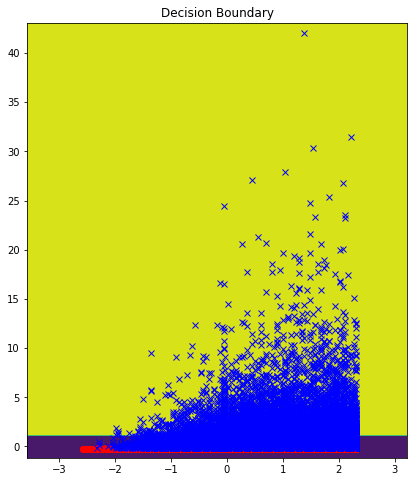

In [43]:
x_min, x_max = X_clf[:, 0].min() - 1, X_clf[:, 0].max() + 1
y_min, y_max = X_clf1[:, 1].min() - 1, X_clf1[:, 1].max() + 1
xs, ys = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Xtest1 = np.vstack((xs.flat, ys.flat)).T
XtestS = (Xtest1-means) / stds

y1 = pockt.use(XtestS)

fig = plt.figure(figsize=(15,8))
plt.subplot(1,2,2)
plt.contourf(xs, ys, np.array(y1).reshape(xs.shape))
plt.title("Decision Boundary")
plt.plot(X_clf[:, 0], X_clf[:, 1], 'or')
plt.plot(X_clf1[:, 0], X_clf1[:, 1], 'xb')


#### Experiment with QDA

In [44]:
N = len(Xs)

qda = Qda(N)

qda.train(X_clf,T_clf)
d1 = qda.use(X_tests)

qda.train(X_clf1,T_clf1)
d2 = qda.use(X_tests)

In [45]:
D = np.vstack((d1,d2)).T
Y_qda = [-1 if D[i,0] > D[i,1] else 1 for i in range(len(D))]

T_qda = Ttest.flatten()

#### Train and test accuracies

In this section I will show the accuracy, precision,recall,specificity and f1 score of the Perceptron Model using accuracy, confusion matrix and estimation matrix.

In [112]:
print("The Accuracy of QDA is: ", 100 - np.mean(np.abs(T_qda - Y_qda)) * 100, "%")

The Accuracy of QDA is:  95.06776145694235 %


In [47]:
CM = confusion_matrix(Y_qda,T_qda)
CM = CM.values

In [48]:
estimation_matrix(CM)

The precision of the model is  0.8970588235294118
The recall of the model is  1.0
The specificity of the model is  0.968588282126443
The f1 Score of the model is  0.9457364341085273


#### Visualization of QDA

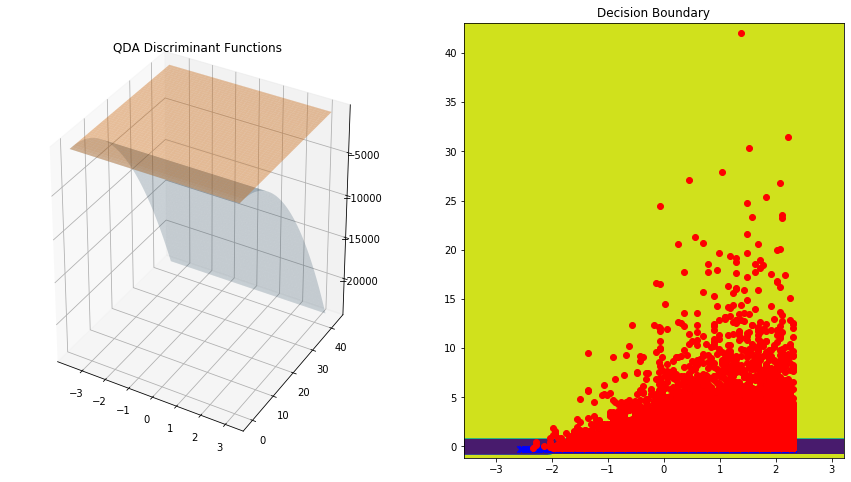

In [49]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D


# Plotting decision regions
x_min, x_max = X_clf[:, 0].min() - 1, X_clf[:, 0].max() + 1
y_min, y_max = X_clf1[:, 1].min() - 1, X_clf1[:, 1].max() + 1
xs, ys = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Xtest1 = np.vstack((xs.flat, ys.flat)).T
XtestS = (Xtest1-means) / stds

qda.train(X_clf,T_clf)
d1 = qda.use(XtestS)

qda.train(X_clf1,T_clf1)
d2 = qda.use(XtestS)


fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(xs, ys, d1.reshape(xs.shape), alpha=0.2)
ax.plot_surface(xs, ys, d2.reshape(xs.shape), alpha=0.4)
plt.title("QDA Discriminant Functions")


plt.subplot(1,2,2)
plt.contourf(xs, ys, (d2-d1 > 0).reshape(xs.shape))
plt.title("Decision Boundary")
plt.plot(X_clf[:, 0], X_clf[:, 1], 'xb')
plt.plot(X_clf1[:, 0], X_clf1[:, 1], 'or')




#### Experiment with LDA

In [50]:
N = len(Xs)

lda = Lda(N)

lda.cov(Xs)

lda.train(X_clf,T_clf)
d1 = lda.use(X_tests)

lda.train(X_clf1,T_clf1)
d2 = lda.use(X_tests)

In [51]:
D1 = np.vstack((d1,d2)).T
Y_lda = [-1 if D1[i,0] > D1[i,1] else 1 for i in range(len(D1))]

T_lda = Ttest.flatten()


#### Train and test accuracies

In this section I will show the accuracy, precision,recall,specificity and f1 score of the Perceptron Model using accuracy, confusion matrix and estimation matrix.

In [113]:
print("The Accuracy of LDA is: ", 100 - np.mean(np.abs(T_lda - Y_lda)) * 100, "%")

The Accuracy of LDA is:  76.79347671676564 %


In [53]:
CM1 = confusion_matrix(Y_lda,T_lda)
CM1 = CM1.values

In [54]:
estimation_matrix(CM1)

The precision of the model is  0.7850589777195282
The recall of the model is  0.6335272342675833
The specificity of the model is  0.9525205370390475
The f1 Score of the model is  0.70119988293825


#### Visualizations of LDA

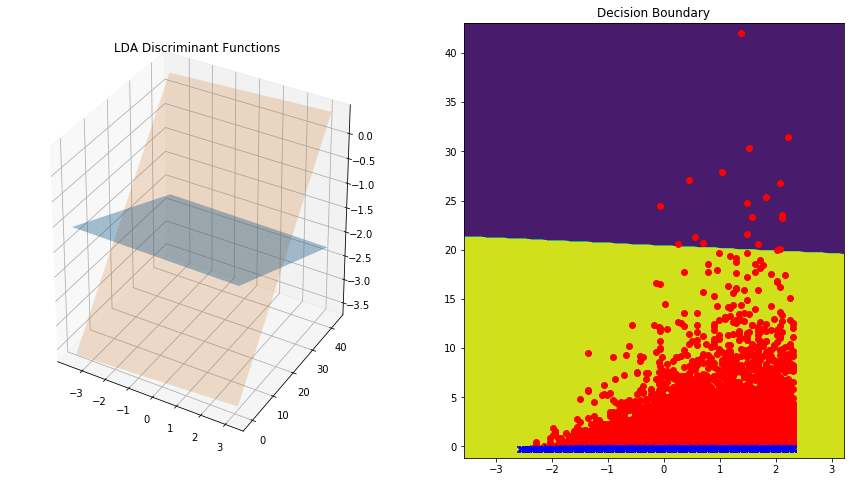

In [55]:

# Plotting decision regions
x_min, x_max = X_clf[:, 0].min() - 1, X_clf[:, 0].max() + 1
y_min, y_max = X_clf1[:, 1].min() - 1, X_clf1[:, 1].max() + 1
xs, ys = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Xtest1 = np.vstack((xs.flat, ys.flat)).T
XtestS = (Xtest1-means) / stds

lda.train(X_clf,T_clf)
d1 = lda.use(XtestS)

lda.train(X_clf1,T_clf1)
d2 = lda.use(XtestS)


fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(121, projection='3d')

ax.plot_surface(xs, ys, d1.reshape(xs.shape), alpha=0.4)
ax.plot_surface(xs, ys, d2.reshape(xs.shape), alpha=0.2)
plt.title("LDA Discriminant Functions")

# plt.figure(figsize=(6,6))
plt.subplot(1,2,2)
plt.contourf(xs, ys, (d1-d2 > 0).reshape(xs.shape))
plt.title("Decision Boundary")
plt.plot(X_clf1[:, 0], X_clf1[:, 1], 'or')
plt.plot(X_clf[:, 0], X_clf[:, 1], 'xb')

#### Experiment with Logistic Regression

In [56]:
alpha = 0.0001
maxiter = 10
lr = LogReg(alpha, maxiter)
W = lr.train(Xs_lr,Ttrain_lr)

Y_lr = lr.use(Xtests_lr)

The current step iteration is  0
The current step iteration is  1
The current step iteration is  2
The current step iteration is  3
The current step iteration is  4
The current step iteration is  5
The current step iteration is  6
The current step iteration is  7
The current step iteration is  8
The current step iteration is  9


In [109]:
T_lr = np.argmax(Ttest_lr, 1)
T_lr

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

#### Train and test accuracies

In this section I will show the accuracy, precision,recall,specificity and f1 score of the Perceptron Model using accuracy, confusion matrix and estimation matrix.

In [114]:
print("The Accuracy of Logistic regression model is: ", 100 - np.mean(np.abs(T_lr - Y_lr)) * 100, "%")

The Accuracy of Logistic regression model is:  95.71270278716936 %


In [115]:
CM3 = confusion_matrix(Y_lr,T_lr)
CM3 = CM3.values

In [116]:
estimation_matrix(CM3)

The precision of the model is  0.9651252112459672
The recall of the model is  0.8305129561078795
The specificity of the model is  0.9917851843809937
The f1 Score of the model is  0.8927733958644213


#### Visualization of Logistic Regression

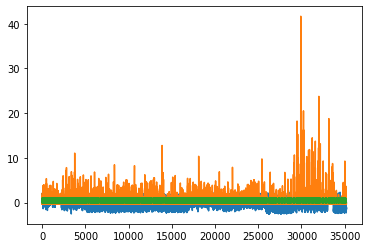

In [103]:
plt.plot(Xtests_lr)
plt.plot(T_lr)

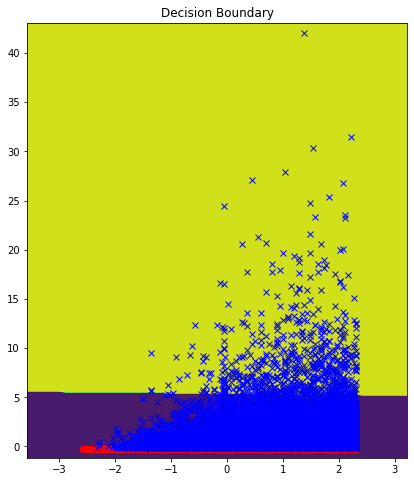

In [105]:
x_min, x_max = X_clf[:, 0].min() - 1, X_clf[:, 0].max() + 1
y_min, y_max = X_clf1[:, 1].min() - 1, X_clf1[:, 1].max() + 1
xs, ys = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Xtest1 = np.vstack((xs.flat, ys.flat)).T
XtestS = (Xtest1-means) / stds

y2 = lr.use(XtestS)

fig = plt.figure(figsize=(15,8))
plt.subplot(1,2,2)
plt.contourf(xs, ys, np.array(y2).reshape(xs.shape))
plt.title("Decision Boundary")
plt.plot(X_clf[:, 0], X_clf[:, 1], 'or')
plt.plot(X_clf1[:, 0], X_clf1[:, 1], 'xb')

### Classification Model Comparison

1. As we can see that the accuracy of pocket algorithm is 99.94 which is great and highest among all the four classification models.That is because pocket alogorithm is modified version of perceptron algorithm, in which we are updating weights and comparing it with pocketed weights and we change it only when the updated weight is less than the pocketed weight.

2. The accuracy of the QDA(Quadratic Discriminant Analysis) is around 95 percent, which is good. As QDA doesn't assume covariance matrix to be equal for the whole dataset. Instead it calculates covariance matrix for each instance, which makes it easier for QDA to classify the points on boundary than LDA

3. The Accuracy of the LDA(Linear Discriminant Ananlysis) is around 77 percent, which is not that bad. But is is lowest among all four classification models. It assumes the covariance matrix is same for the whole dataset, due to which it is hard for LDA to classify data points or instance which are closer to decision boundary. That is why the accuracy of this model is less.

4. The accuracy of Logistic Regression is around 96 percent, which is also very good.In logistic regression first I had to transform the target variable into indicator variable, which is not the case for the rest of the algorithms.

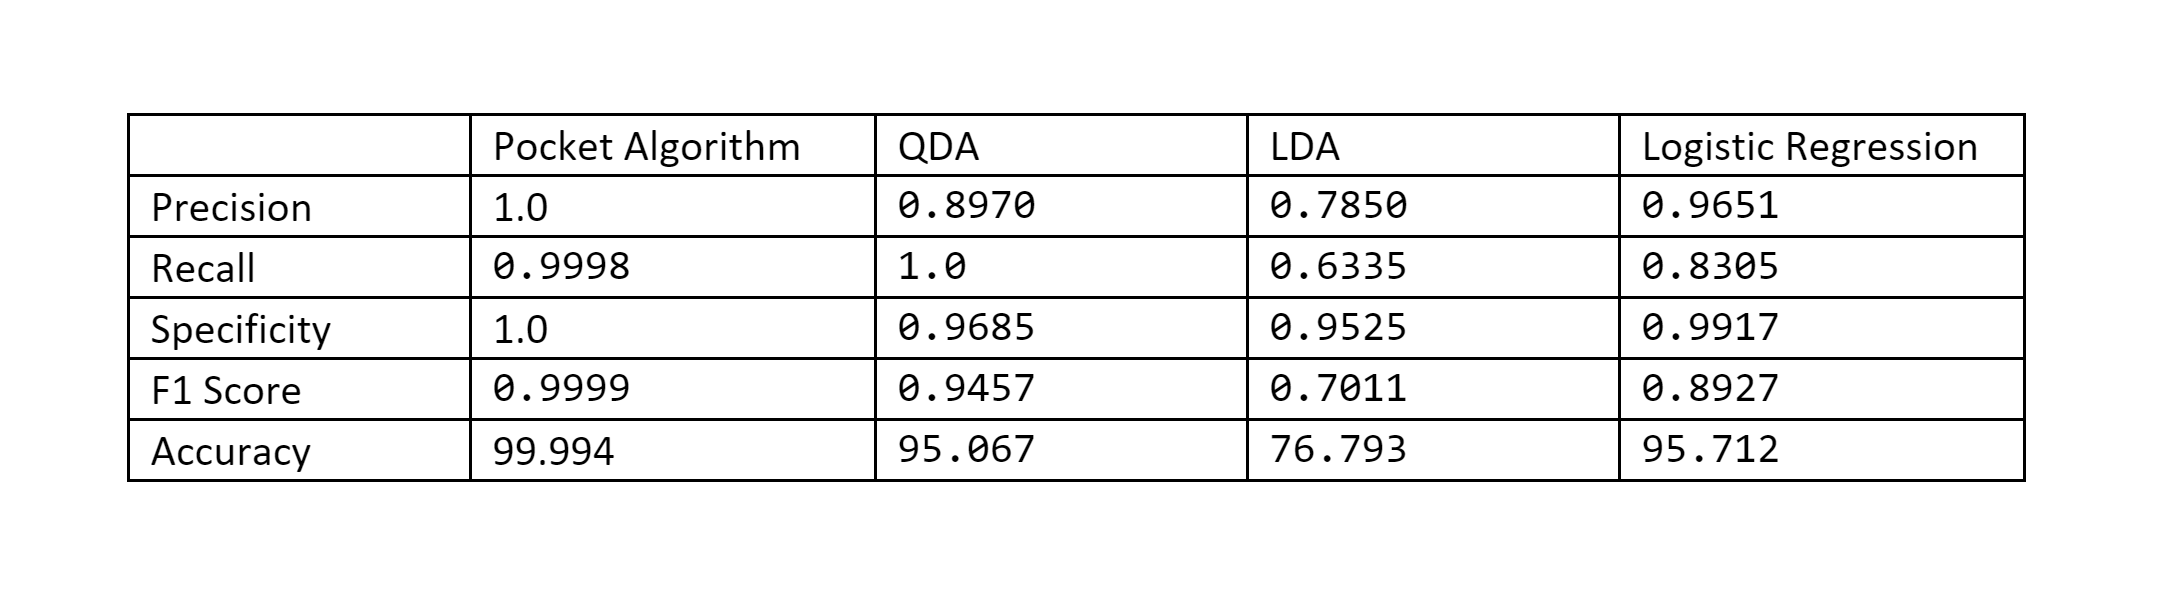

In [73]:
from IPython.display import Image
Image(filename='./comp.png')

# Conclusions
 
Although the accuracy of pocket algorithm is almost around 100 percent but I think the best model is Logistic regression because this model generalizes well. I have learned about the all the four algorithms which is implemented in this assignment. The challenging part for me to implement pocket algorithm because it was taking so long during training process. I had to tweak it little bit to work fast.Second, challenging part was that initially, I didn't transform the target variable into indicator variable for Logistic Regression due to which I was facing issue. Then I asked professor about it and he helped me through this. Also, for this assignment I used very few features so that all algorithm works fast and well. 

# References
[1]. Geron,Aurelien. "Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: 2nd Edition".<br>
[2]. BLOG, Data Science "https://www.datascienceblog.net/post/machine-learning/linear-discriminant-analysis/" ,Accessed on 17th October 2020.<br>
[3]. Stackover Flow, for errors like Attribute Error, Type Error etc, Accessed 19th October 2020<br>
[4]. Geeks for Geeks "https://www.geeksforgeeks.org/confusion-matrix-machine-learning/", Accessed on 27th october 2020.

# Extra Credit

* [OPT 1] Search for a ordinal data set and apply your classifiers to it. 
  - Repeat the experiments on it. 
  - Do you have different observation from previous results? 
  - Were you able to observe that we discussed in class about logistic regression? 
  - For a full extra credit point, you need to discuss all bullet points in Results section.     


* [OPT 2] Partition your data into five sets. Selecting one test set and the other for training, repeat your experiments and observe/analyze the 5 different training/testing errors.  

## Grading

DO NOT forget to submit your data! Your notebook is supposed to run well after running your codes.

To help our TA's grading, please make an explicit section for each grading criteria. 

** Note: this is a WRITING assignment. Proper writing is REQUIRED. Comments are not considered as writing. ** 



points | | description
--|--|:--
5 | Overview| states the objective and the appraoch 
15 | Data | 
 | 5| description 
 | 5| plots for understanding or analysis 
 | 5| preliminary observation 
25 | Methods | 
 |10| Summary of Classification models
 | 5| Explanation of codes
 |10| Pocket, LDA, QDA, Logistic Regression
40 | Experiments 
| 5| Discussion about evaluation metrics
| 5| Discussion about train and test accuracies
|20| plots for results (5 for each algorithm)
|10| Discussions about classificaion model comparison
5 | |Conclusions 
5 | |Referemces
5 | |Grammar and spelling error (Proofread please)